In [1]:
import concrete.numpy as cnp
import numpy as np
import pandas as pd
import time
from matplotlib import pyplot as plt

# Data Cleaning

In [2]:
df_hosp = pd.read_csv('Hospital_Inpatient_Discharges__SPARCS_De-Identified___2015.csv')
df_hosp = df_hosp.sample(n = int(len(df_hosp)*0.25))

df_hosp.head()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3378: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Health Service Area,Hospital County,Operating Certificate Number,Facility Id,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,...,Payment Typology 2,Payment Typology 3,Attending Provider License Number,Operating Provider License Number,Other Provider License Number,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator,Total Charges,Total Costs
1987500,New York City,Richmond,7004003.0,1740.0,Staten Island University Hosp-North,50 to 69,OOS,M,White,Not Span/Hispanic,...,Medicare,NaN,214932.0,130543.0,NaN,0,N,Y,$27458.74,$5254.69
2075011,Long Island,Nassau,2908000.0,511.0,Winthrop-University Hospital,30 to 49,114,F,Other Race,Not Span/Hispanic,...,NaN,NaN,214131.0,NaN,NaN,0,N,Y,$25066.68,$4172.78
2178800,Long Island,Nassau,2951001.0,541.0,North Shore University Hospital,30 to 49,115,F,White,Not Span/Hispanic,...,NaN,NaN,161044.0,161044.0,NaN,0,N,N,$28764.67,$7567.57
220310,Finger Lakes,Monroe,2701003.0,411.0,Rochester General Hospital,70 or Older,146,F,White,Not Span/Hispanic,...,NaN,NaN,205882.0,205882.0,NaN,0,N,N,$17862.81,$8144.56
2291110,Long Island,Suffolk,5154000.0,924.0,Southside Hospital,70 or Older,117,F,White,Not Span/Hispanic,...,Medicare,NaN,166249.0,249241.0,NaN,0,N,Y,$117563.88,$31092.25


In [3]:
# data cleaning

df_hosp.drop(columns=['Type of Admission', 'Patient Disposition', 'Payment Typology 1', 'Payment Typology 2',
                     'Payment Typology 3', 'Attending Provider License Number', 'Operating Provider License Number',
                     'Other Provider License Number', 'Total Charges', 'Total Costs', 'Zip Code - 3 digits', 
                      'APR DRG Code', 'APR DRG Description', 'APR MDC Code', 'APR MDC Description', 
                      'APR Medical Surgical Description', 'Birth Weight', 'Abortion Edit Indicator', 'Emergency Department Indicator'], inplace=True)

df_hosp.columns = df_hosp.columns.str.replace(' ', '_').str.lower()

df_hosp.length_of_stay.replace('120 +', '120', inplace=True)
df_hosp['length_of_stay'] = df_hosp['length_of_stay'].apply(lambda x: str(x).split(' ')[0])
df_hosp['length_of_stay'] = pd.to_numeric(df_hosp['length_of_stay'])

df_hosp.to_csv('Hospital_Inpatient_Discharges__SPARCS_De-Identified___2015_cleaned.csv')

In [2]:
df_hosp = pd.read_csv('Hospital_Inpatient_Discharges__SPARCS_De-Identified___2015_cleaned.csv')

# **Mean**

In [3]:
#make df for saving time of keygen
#create df for saving avg calc times

df_avg_keygen = pd.DataFrame({'nr_entries': [], 'times_keygen': []})
df_avg_calc = pd.DataFrame({'nr_entries': [], 'times_calc_encr': []})

In [4]:
#prepare subdataframe for inputting into HE function
#only numbers from 1-21 length of stay

df_hosp_avg = df_hosp.query('length_of_stay >= 1 and length_of_stay <= 14')


In [5]:
# 20 data points
entries = 20

start = time.time()

def div(x):
    return np.sum(x) // x.size

compiler = cnp.Compiler(div, {"x": "encrypted"})

inputset = [np.random.randint(1, 14, size=(1, entries))]
#inputset = [np.random.randint(1, 30, size=(1, entries)) for _ in range(entries)]
#inputset = [[1, 10, 40, 90, 100]]

circuit_avg_20 = compiler.compile(inputset)

circuit_avg_20.keygen()

time_elapsed = time.time()-start

df_avg_keygen = df_avg_keygen.append({'nr_entries': entries, 'times_keygen': time_elapsed}, ignore_index=True)

df_avg_keygen.to_csv('keygen20.csv')


In [6]:
df_input = df_hosp_avg[df_hosp_avg['hospital_county'] == 'Cattaraugus'].sample(20)
input_avg20 = np.array(df_input.length_of_stay)
input_avg20 = input_avg20.reshape(1,20)

start = time.time()

he_avg20 = circuit_avg_20.encrypt_run_decrypt(input_avg20)

time_elapsed = time.time()-start

df_avg_calc = df_avg_calc.append({'nr_entries': entries, 'times_calc_encr': time_elapsed}, ignore_index=True)
df_avg_calc.to_csv('avg20.csv')

print(f'Mean of Length of Stay for Cattaraugus county for patients staying less than 2 weeks: {he_avg20}')

Mean of Length of Stay for Cattaraugus county for patients staying less than 2 weeks: 3


In [7]:
# 15 data points
entries = 15

start = time.time()

def div(x):
    return np.sum(x) // x.size

compiler = cnp.Compiler(div, {"x": "encrypted"})

inputset = [np.random.randint(1, 14, size=(1, entries))]


circuit_avg_15 = compiler.compile(inputset)

circuit_avg_15.keygen()

time_elapsed = time.time()-start

df_avg_keygen = df_avg_keygen.append({'nr_entries': entries, 'times_keygen': time_elapsed}, ignore_index=True)

df_avg_keygen.to_csv('keygen15.csv')


In [8]:
df_input = df_hosp_avg[df_hosp_avg['hospital_county'] == 'Cattaraugus'].sample(15)
input_avg15 = np.array(df_input.length_of_stay)
input_avg15 = input_avg15.reshape(1,15)

start = time.time()

he_avg15 = circuit_avg_15.encrypt_run_decrypt(input_avg15)

time_elapsed = time.time()-start

df_avg_calc = df_avg_calc.append({'nr_entries': entries, 'times_calc_encr': time_elapsed}, ignore_index=True)
df_avg_calc.to_csv('avg15.csv')

print(f'Mean of Length of Stay for Cattaraugus county for patients staying less than 2 weeks: {he_avg15}')

Mean of Length of Stay for Cattaraugus county for patients staying less than 2 weeks: 5


In [9]:
#10 data points
entries = 10

start = time.time()

def div(x):
    return np.sum(x) // x.size

compiler = cnp.Compiler(div, {"x": "encrypted"})

inputset = [np.random.randint(1, 14, size=(1, entries))]


circuit_avg_10 = compiler.compile(inputset)

circuit_avg_10.keygen()

time_elapsed = time.time()-start

df_avg_keygen = df_avg_keygen.append({'nr_entries': entries, 'times_keygen': time_elapsed}, ignore_index=True)

df_avg_keygen.to_csv('keygen10.csv')


In [10]:
df_input = df_hosp_avg[df_hosp_avg['hospital_county'] == 'Cattaraugus'].sample(10)
input_avg10 = np.array(df_input.length_of_stay)
input_avg10 = input_avg10.reshape(1,10)

start = time.time()

he_avg10 = circuit_avg_10.encrypt_run_decrypt(input_avg10)

time_elapsed = time.time()-start

df_avg_calc = df_avg_calc.append({'nr_entries': entries, 'times_calc_encr': time_elapsed}, ignore_index=True)
df_avg_calc.to_csv('avg10.csv')

print(f'Mean of Length of Stay for Cattaraugus county for patients staying less than 2 weeks: {he_avg10}')

Mean of Length of Stay for Cattaraugus county for patients staying less than 2 weeks: 4


In [11]:
#5 data points
entries = 5

start = time.time()

def div(x):
    return np.sum(x) // x.size

compiler = cnp.Compiler(div, {"x": "encrypted"})

inputset = [np.random.randint(1, 14, size=(1, entries))]


circuit_avg_5 = compiler.compile(inputset)

circuit_avg_5.keygen()

time_elapsed = time.time()-start

df_avg_keygen = df_avg_keygen.append({'nr_entries': entries, 'times_keygen': time_elapsed}, ignore_index=True)

df_avg_keygen.to_csv('keygen5.csv')


In [12]:
df_input = df_hosp_avg[df_hosp_avg['hospital_county'] == 'Cattaraugus'].sample(5)
input_avg5 = np.array(df_input.length_of_stay)
input_avg5 = input_avg5.reshape(1,5)

start = time.time()

he_avg5 = circuit_avg_5.encrypt_run_decrypt(input_avg5)

time_elapsed = time.time()-start

df_avg_calc = df_avg_calc.append({'nr_entries': entries, 'times_calc_encr': time_elapsed}, ignore_index=True)
df_avg_calc.to_csv('avg5.csv')

print(f'Mean of Length of Stay for Cattaraugus county for patients staying less than 2 weeks: {he_avg5}')

Mean of Length of Stay for Cattaraugus county for patients staying less than 2 weeks: 3


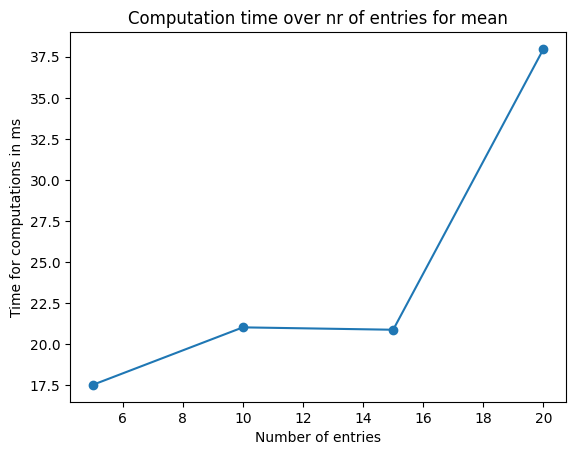

In [13]:
%matplotlib inline
plt.plot(df_avg_calc.nr_entries, df_avg_calc.times_calc_encr, marker='o')
plt.xlabel('Number of entries')
plt.ylabel('Time for computations in ms')

plt.title('Computation time over nr of entries for mean')
plt.show()

In [16]:
df_avg_plain = pd.DataFrame({'nr_entries': [], 'times_calc_plain': [], 'results': []})

In [17]:
def avg(x):
    start = time.time()
    result = np.sum(x)/x.size
    time_elapsed = time.time()-start
    return result, time_elapsed

df_avg_plain = df_avg_plain.append({'nr_entries': input_avg5.size, 'times_calc_plain': avg(input_avg5)[1], 'results': avg(input_avg5)[0]}, ignore_index=True)
df_avg_plain = df_avg_plain.append({'nr_entries': input_avg10.size, 'times_calc_plain': avg(input_avg10)[1], 'results': avg(input_avg10)[0]}, ignore_index=True)
df_avg_plain = df_avg_plain.append({'nr_entries': input_avg15.size, 'times_calc_plain': avg(input_avg15)[1], 'results': avg(input_avg15)[0]}, ignore_index=True)
df_avg_plain = df_avg_plain.append({'nr_entries': input_avg20.size, 'times_calc_plain': avg(input_avg20)[1], 'results': avg(input_avg20)[0]}, ignore_index=True)

df_avg_plain

,nr_entries,times_calc_plain,results
0,5.0,0.000244,3.20
1,10.0,0.000269,4.30
2,15.0,0.000123,5.00
3,20.0,0.000145,3.15


In [18]:
df_avg_plain.to_csv('df_avg_plain.csv')

In [22]:
merged_avg = pd.merge(df_avg_plain[['nr_entries','times_calc_plain']], df_avg_calc[['nr_entries', 'times_calc_encr']], on='nr_entries')
merged_avg = merged_avg.assign(factor=merged_avg['times_calc_encr'] / merged_avg['times_calc_plain'])
merged_avg['factor'] = merged_avg['factor'].round()

merged_avg

,nr_entries,times_calc_plain,times_calc_encr,factor
0,5.0,0.000244,17.522488,71842.0
1,10.0,0.000269,21.026711,78116.0
2,15.0,0.000123,20.881067,170392.0
3,20.0,0.000145,37.975723,261118.0


# **Distribution**

In [14]:
df_keygen_dist = pd.DataFrame({'nr_entries': [], 'times_keygen': []})
df_dist_calc = pd.DataFrame({'nr_entries': [], 'times_calc': []})

In [15]:
#25 entries major severity illnes
entries = 25

start = time.time()

def dist_he(x):
    return np.where(x == 3, 1, 0)

compiler = cnp.Compiler(dist_he, {'x': 'encrypted'})

inputset = [np.random.randint(1, 4, size=(1, entries))]


circuit_dist_25 = compiler.compile(inputset)

circuit_dist_25.keygen()

time_elapsed = time.time()-start

df_keygen_dist = df_keygen_dist.append({'nr_entries': entries, 'times_keygen': time_elapsed}, ignore_index=True)

In [16]:
df_input_25 = df_hosp[df_hosp['age_group'] == '18 to 29'].sample(25)
input_dist_25 = np.array(df_input_25.apr_severity_of_illness_code)
input_dist_25 = input_dist_25.reshape(1,25)


start = time.time()

he_dist_25 = circuit_dist_25.encrypt_run_decrypt(input_dist_25)
result = np.sum(he_dist_25)/he_dist_25.size

time_elapsed = time.time()-start

df_dist_calc = df_dist_calc.append({'nr_entries': entries, 'times_calc': time_elapsed}, ignore_index=True)

print(f'Percentage of 18 to 29 year old patients with major severity of illness: {result*100}%')

Percentage of 18 to 29 year old patients with major severity of illness: 4.0%


In [17]:
#40 entries major severity illnes
entries = 40

start = time.time()

def dist_he(x):
    return np.where(x == 3, 1, 0)

compiler = cnp.Compiler(dist_he, {'x': 'encrypted'})

inputset = [np.random.randint(1, 4, size=(1, entries))]


circuit_dist_40 = compiler.compile(inputset)

circuit_dist_40.keygen()

time_elapsed = time.time()-start

df_keygen_dist = df_keygen_dist.append({'nr_entries': entries, 'times_keygen': time_elapsed}, ignore_index=True)

In [18]:
df_input_40 = df_hosp[df_hosp['age_group'] == '18 to 29'].sample(40)
input_dist_40 = np.array(df_input_40.apr_severity_of_illness_code)
input_dist_40 = input_dist_40.reshape(1,40)


start = time.time()

he_dist_40 = circuit_dist_40.encrypt_run_decrypt(input_dist_40)
result = np.sum(he_dist_40)/he_dist_40.size

time_elapsed = time.time()-start

df_dist_calc = df_dist_calc.append({'nr_entries': entries, 'times_calc': time_elapsed}, ignore_index=True)

print(f'Percentage of 18 to 29 year old patients with major severity of illness: {result*100}%')

Percentage of 18 to 29 year old patients with major severity of illness: 10.0%


In [19]:
#50 entries major severity illnes
entries = 50

start = time.time()

def dist_he(x):
    return np.where(x == 3, 1, 0)

compiler = cnp.Compiler(dist_he, {'x': 'encrypted'})

inputset = [np.random.randint(1, 4, size=(1, entries))]


circuit_dist_50 = compiler.compile(inputset)

circuit_dist_50.keygen()

time_elapsed = time.time()-start

df_keygen_dist = df_keygen_dist.append({'nr_entries': entries, 'times_keygen': time_elapsed}, ignore_index=True)

In [20]:
df_input_50 = df_hosp[df_hosp['age_group'] == '18 to 29'].sample(50)
input_dist_50 = np.array(df_input_50.apr_severity_of_illness_code)
input_dist_50 = input_dist_50.reshape(1,50)


start = time.time()

he_dist_50 = circuit_dist_50.encrypt_run_decrypt(input_dist_50)
result = np.sum(he_dist_50)/he_dist_50.size

time_elapsed = time.time()-start

df_dist_calc = df_dist_calc.append({'nr_entries': entries, 'times_calc': time_elapsed}, ignore_index=True)

print(f'Percentage of 18 to 29 year old patients with major severity of illness: {result*100}%')

Percentage of 18 to 29 year old patients with major severity of illness: 10.0%


In [21]:
#60 entries major severity illnes
entries = 60

start = time.time()

def dist_he(x):
    return np.where(x == 3, 1, 0)

compiler = cnp.Compiler(dist_he, {'x': 'encrypted'})

inputset = [np.random.randint(1, 4, size=(1, entries))]


circuit_dist_60 = compiler.compile(inputset)

circuit_dist_60.keygen()

time_elapsed = time.time()-start

df_keygen_dist = df_keygen_dist.append({'nr_entries': entries, 'times_keygen': time_elapsed}, ignore_index=True)

In [23]:
df_input_60 = df_hosp[df_hosp['age_group'] == '18 to 29'].sample(60)
input_dist_60 = np.array(df_input_60.apr_severity_of_illness_code)
input_dist_60 = input_dist_60.reshape(1,60)


start = time.time()

he_dist_60 = circuit_dist_60.encrypt_run_decrypt(input_dist_60)
result = np.sum(he_dist_60)/he_dist_60.size

time_elapsed = time.time()-start

df_dist_calc = df_dist_calc.append({'nr_entries': entries, 'times_calc': time_elapsed}, ignore_index=True)

print(f'Percentage of 18 to 29 year old patients with major severity of illness: {result*100}%')

Percentage of 18 to 29 year old patients with major severity of illness: 13.333333333333334%


In [24]:
#75 entries major severity illness
entries = 75

start = time.time()

def dist_he(x):
    return np.where(x == 3, 1, 0)

compiler = cnp.Compiler(dist_he, {'x': 'encrypted'})

inputset = [np.random.randint(0, 4, size=(1, entries))]


circuit_dist_75 = compiler.compile(inputset)

circuit_dist_75.keygen()

time_elapsed = time.time()-start

df_keygen_dist = df_keygen_dist.append({'nr_entries': entries, 'times_keygen': time_elapsed}, ignore_index=True)

In [39]:
df_input_75 = df_hosp[df_hosp['age_group'] == '18 to 29'].sample(75)
input_dist_75 = np.array(df_input_75.apr_severity_of_illness_code)
input_dist_75 = input_dist_75.reshape(1,75)


start = time.time()

he_dist_75 = circuit_dist_75.encrypt_run_decrypt(input_dist_75)
result = np.sum(he_dist_75)/he_dist_75.size

time_elapsed = time.time()-start

df_dist_calc = df_dist_calc.append({'nr_entries': entries, 'times_calc': time_elapsed}, ignore_index=True)

print(f'Percentage of 18 to 29 year old patients with major severity of illness: {result*100}%')

Percentage of 18 to 29 year old patients with major severity of illness: 16.0%


In [40]:
#90 entries major severity illness
entries = 90

start = time.time()

def dist_he(x):
    return np.where(x == 3, 1, 0)

compiler = cnp.Compiler(dist_he, {'x': 'encrypted'})

inputset = [np.random.randint(0, 4, size=(1, entries))]


circuit_dist_90 = compiler.compile(inputset)

circuit_dist_90.keygen()

time_elapsed = time.time()-start

df_keygen_dist = df_keygen_dist.append({'nr_entries': entries, 'times_keygen': time_elapsed}, ignore_index=True)

In [45]:
df_input_90 = df_hosp[df_hosp['age_group'] == '18 to 29'].sample(90)
input_dist_90 = np.array(df_input_90.apr_severity_of_illness_code)
input_dist_90 = input_dist_90.reshape(1,90)


start = time.time()

he_dist_90 = circuit_dist_90.encrypt_run_decrypt(input_dist_90)
result = np.sum(he_dist_90)/he_dist_90.size

time_elapsed = time.time()-start

df_dist_calc = df_dist_calc.append({'nr_entries': entries, 'times_calc': time_elapsed}, ignore_index=True)

print(f'Percentage of 18 to 29 year old patients with major severity of illness: {result*100}%')

Percentage of 18 to 29 year old patients with major severity of illness: 13.333333333333334%


In [46]:
#100 entries major severity illness
entries = 100

start = time.time()

def dist_he(x):
    return np.where(x == 3, 1, 0)

compiler = cnp.Compiler(dist_he, {'x': 'encrypted'})

inputset = [np.random.randint(0, 4, size=(1, entries))]


circuit_dist_100 = compiler.compile(inputset)

circuit_dist_100.keygen()

time_elapsed = time.time()-start

df_keygen_dist = df_keygen_dist.append({'nr_entries': entries, 'times_keygen': time_elapsed}, ignore_index=True)

In [51]:
df_input_100 = df_hosp[df_hosp['age_group'] == '18 to 29'].sample(100)
input_dist_100 = np.array(df_input_100.apr_severity_of_illness_code)
input_dist_100 = input_dist_100.reshape(1,100)


start = time.time()

he_dist_100 = circuit_dist_100.encrypt_run_decrypt(input_dist_100)
result = np.sum(he_dist_100)/he_dist_100.size

time_elapsed = time.time()-start

df_dist_calc = df_dist_calc.append({'nr_entries': entries, 'times_calc': time_elapsed}, ignore_index=True)

print(f'Percentage of 18 to 29 year old patients with major severity of illness: {result*100}%')

Percentage of 18 to 29 year old patients with major severity of illness: 7.000000000000001%


In [53]:
df_keygen_dist.to_csv('df_keygen_dist.csv')

In [54]:
df_dist_calc.to_csv('df_dist_calc.csv')

In [55]:
df_dist_calc_plain = pd.DataFrame({'nr_entries': [], 'times_calc': [], 'results': []})

In [56]:
#perform the calculations unencrypted

def dist(x):
    start = time.time()
    a = np.where(x == 3, 1, 0)
    result = np.sum(a)/a.size
    time_elapsed = time.time()-start
    #df_dist_calc_plain = df_dist_calc_plain.append({'nr_entries': x.size, 'times_calc': time_elapsed}, ignore_index=True)
    return result, time_elapsed

df_dist_calc_plain = df_dist_calc_plain.append({'nr_entries': input_dist_25.size, 'times_calc': dist(input_dist_25)[1], 'results': dist(input_dist_25)[0]}, ignore_index=True)
df_dist_calc_plain = df_dist_calc_plain.append({'nr_entries': input_dist_40.size, 'times_calc': dist(input_dist_40)[1], 'results': dist(input_dist_40)[0]}, ignore_index=True)
df_dist_calc_plain = df_dist_calc_plain.append({'nr_entries': input_dist_50.size, 'times_calc': dist(input_dist_50)[1], 'results': dist(input_dist_50)[0]}, ignore_index=True)
df_dist_calc_plain = df_dist_calc_plain.append({'nr_entries': input_dist_60.size, 'times_calc': dist(input_dist_60)[1], 'results': dist(input_dist_60)[0]}, ignore_index=True)
df_dist_calc_plain = df_dist_calc_plain.append({'nr_entries': input_dist_75.size, 'times_calc': dist(input_dist_75)[1], 'results': dist(input_dist_75)[0]}, ignore_index=True)
df_dist_calc_plain = df_dist_calc_plain.append({'nr_entries': input_dist_90.size, 'times_calc': dist(input_dist_90)[1], 'results': dist(input_dist_90)[0]}, ignore_index=True)
df_dist_calc_plain = df_dist_calc_plain.append({'nr_entries': input_dist_100.size, 'times_calc': dist(input_dist_100)[1], 'results': dist(input_dist_100)[0]}, ignore_index=True)
df_dist_calc_plain

,nr_entries,times_calc,results
0,25.0,0.000961,0.040000
1,40.0,0.000249,0.100000
2,50.0,0.000193,0.100000
3,60.0,0.000165,0.133333
4,75.0,0.000165,0.160000
5,90.0,0.000144,0.133333
6,100.0,0.000130,0.070000


In [57]:
df_dist_calc_plain.to_csv('df_dist_calc_plain.csv')

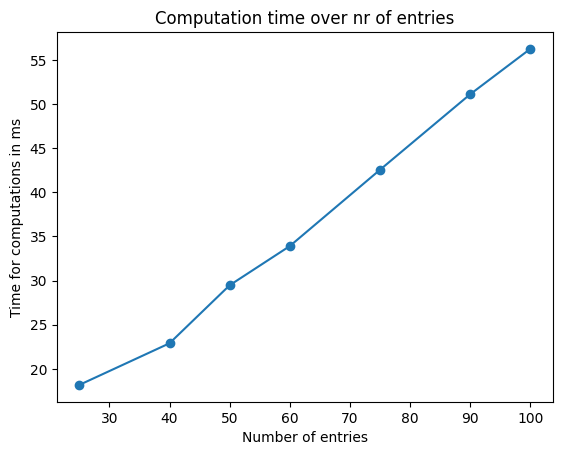

In [58]:
%matplotlib inline
plt.plot(df_dist_calc.nr_entries, df_dist_calc.times_calc, marker='o')
plt.xlabel('Number of entries')
plt.ylabel('Time for computations in ms')

plt.title('Computation time over nr of entries')
plt.show()

In [62]:
df_dist_calc.rename(columns={'times_calc': 'times_calc_encr'}, inplace=True)
df_dist_calc

,nr_entries,times_calc_encr
0,25.0,18.171822
1,40.0,22.891470
2,50.0,29.466722
3,60.0,33.906683
4,75.0,42.550858
5,90.0,51.111129
6,100.0,56.257546


In [63]:
df_dist_calc_plain.rename(columns={'times_calc': 'times_calc_plain'}, inplace=True)
df_dist_calc_plain

,nr_entries,times_calc_plain,results
0,25.0,0.000961,0.040000
1,40.0,0.000249,0.100000
2,50.0,0.000193,0.100000
3,60.0,0.000165,0.133333
4,75.0,0.000165,0.160000
5,90.0,0.000144,0.133333
6,100.0,0.000130,0.070000


In [59]:
df_keygen_dist

,nr_entries,times_keygen
0,25.0,10.006033
1,40.0,8.865733
2,50.0,8.429107
3,60.0,8.377146
4,75.0,9.416203
5,90.0,8.417687
6,100.0,8.481077


In [28]:
merged = pd.merge(df_dist_calc_plain[['nr_entries','times_calc_plain']], df_dist_calc[['nr_entries', 'times_calc_encr']], on='nr_entries')
merged = merged.assign(factor=merged['times_calc_encr'] / merged['times_calc_plain'])
merged['factor'] = merged['factor'].round()

merged

,nr_entries,times_calc_plain,times_calc_encr,factor
0,25.0,0.000961,18.171822,18913.0
1,40.0,0.000249,22.891470,91791.0
2,50.0,0.000193,29.466722,152961.0
3,60.0,0.000165,33.906683,205810.0
4,75.0,0.000165,42.550858,257163.0
5,90.0,0.000144,51.111129,353755.0
6,100.0,0.000130,56.257546,431373.0


In [24]:
df_dist_calc_plain = pd.read_csv('df_dist_calc_plain.csv')
df_dist_calc = pd.read_csv('df_dist_calc.csv')

In [26]:
df_dist_calc_plain.rename(columns={'times_calc': 'times_calc_plain'}, inplace=True)
df_dist_calc.rename(columns={'times_calc': 'times_calc_encr'}, inplace=True)